In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/training/training/n1/n1136.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1049.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1064.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1159.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1034.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1030.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1043.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1059.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1032.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1040.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1070.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1068.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1019.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1155.jpg
/kaggle/input/10-monkey-species/training/training/n1/n1026.jpg
/kagg

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.2.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.3
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [34]:
train_dir = '/kaggle/input/10-monkey-species/training/training/'
valid_dir = '/kaggle/input/10-monkey-species/validation/validation/'
lable_file = '/kaggle/input/10-monkey-species/monkey_labels.txt'

print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(lable_file))

True
True
True


In [35]:
lables = pd.read_csv(lable_file,header=0)
lables.head()

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26


In [36]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10

# 训练集
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, # 每个像素点都是0到255的值，处理后得到一个0~1的数
    rotation_range=40,# 图像随机旋转的角度-40~40度之间
    width_shift_range=0.2,# 水平方向平移0~20% >1是像素值,<1是比例
    height_shift_range=0.2, # 垂直方向平移0~20% >1是像素值,<1是比例
    shear_range=0.2, # 剪切强度
    zoom_range=0.2, # 缩放强度
    horizontal_flip=True, # 水平翻转
    fill_mode="nearest", # 图像放大后填充像素的方式，“nearrest”:邻近像素填充

)

In [37]:
train_generrator = train_datagen.flow_from_directory(train_dir,target_size=(height,width),batch_size=batch_size,seed=7,shuffle=True,class_mode="categorical")

# 训练集样本数
train_generrator.samples

Found 1098 images belonging to 10 classes.


1098

In [53]:
train_num = train_generrator.samples

In [38]:
# 验证集
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, # 每个像素点都是0到255的值，处理后得到一个0~1的数
)
vaild_generrator = train_datagen.flow_from_directory(valid_dir,target_size=(height,width),batch_size=batch_size,seed=7,shuffle=True,class_mode="categorical")

# 验证集样本数
vaild_generrator.samples

Found 272 images belonging to 10 classes.


272

In [54]:
valid_num = train_generrator.samples

In [39]:
for i in range(2):
    x,y = train_generrator.next()
    print(x.shape,y.shape)
    print(y)

(64, 128, 128, 3) (64, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [57]:
# 定义卷积神经网络模型
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[width,height,channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                              activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),

    # 添加卷积层2
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                                  activation="relu"
                                ),


    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                              activation="relu"
                            ),
    keras.layers.MaxPool2D(pool_size=2),

    # 添加卷积层1
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                                  activation="relu"
                                ),


    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                              activation="relu"
                            ),
    keras.layers.MaxPool2D(pool_size=2),

    # Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
    keras.layers.Flatten(),

    # 全连接层
    keras.layers.Dense(128,activation="relu"),

    # 输出层
    keras.layers.Dense(num_classes,activation="softmax")
])
#  计算交叉熵损失
# reasone for sparse: y是一个单纯的数字(index),要变成one_hot编码
# 如果y已经是一个向量了就用categorical_crossentropy
# loss：损失函数 交叉熵损失
# optmizer：优化器 sgd 越来越小
# metrics:验证指标
model.compile(loss="categorical_crossentropy",optimizer = "adam",metrics=["accuracy"])

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 128)      

In [59]:
epochs = 10
history = model.fit_generator(train_generrator,
                             steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data= vaild_generrator,
                              validation_steps= valid_num // batch_size
                             )

Epoch 1/10
17/17 [==============================] - 34s 2s/step - loss: 2.3477 - accuracy: 0.0812 - val_loss: 2.2955 - val_accuracy: 0.0956
Epoch 2/10
17/17 [==============================] - 36s 2s/step - loss: 2.2744 - accuracy: 0.1342 - val_loss: 2.2004 - val_accuracy: 0.1728
Epoch 3/10
17/17 [==============================] - 36s 2s/step - loss: 2.0803 - accuracy: 0.2360 - val_loss: 1.9606 - val_accuracy: 0.3088
Epoch 4/10
17/17 [==============================] - 33s 2s/step - loss: 1.9549 - accuracy: 0.2959 - val_loss: 1.8053 - val_accuracy: 0.3897
Epoch 5/10
17/17 [==============================] - 35s 2s/step - loss: 1.7773 - accuracy: 0.3649 - val_loss: 1.8106 - val_accuracy: 0.3713
Epoch 6/10
17/17 [==============================] - 34s 2s/step - loss: 1.8226 - accuracy: 0.3617 - val_loss: 1.7340 - val_accuracy: 0.3713
Epoch 7/10
17/17 [==============================] - 34s 2s/step - loss: 1.6536 - accuracy: 0.4091 - val_loss: 1.6107 - val_accuracy: 0.4191
Epoch 8/10
17/17 [==

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

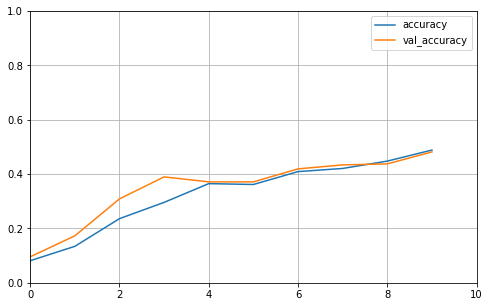

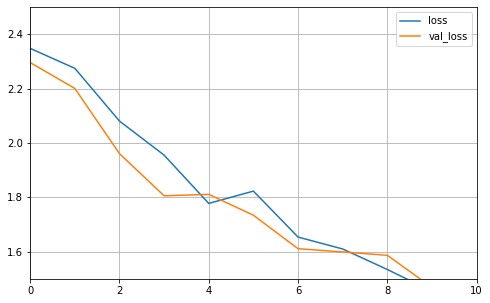

In [66]:
def plot_learning_curvse(history,label,epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data["val_" + label] = history.history["val_" + label]
    pd.DataFrame(data).plot(figsize=(8,5))
    plt.grid(True)
    plt.axis([0, epochs,min_value,max_value])
    plt.show()
    
plot_learning_curvse(history,"accuracy",epochs,0,1)
plot_learning_curvse(history,"loss",epochs,1.3,2.5)